In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

def rhead(x, nrow = 6, ncol = 4):
    pd.set_option('display.expand_frame_repr', False)
    seq = np.arange(0, len(x.columns), ncol)
    for i in seq:
        print(x.loc[range(0, nrow), x.columns[range(i, min(i+ncol, len(x.columns)))]])
    pd.set_option('display.expand_frame_repr', True)
    
#create hifi df
import os

os.chdir("/Users/corbettcarrel/OneDrive - University of Utah/Spring 19/Econ 4670/Hifi")

os.getcwd()

hifi_class = pd.read_csv('HiFICaseManagementClass.csv')

#hifi_class.info()


#cleaning the Data
mask = hifi_class['Service'] == 'Case Management'

hifi_case = hifi_class[mask]

#hifi_case.info()

#removing nans
hifi_case = hifi_case.dropna()

#hifi_case.info()

#removing unnessacary variables
del hifi_case['EnrollDate']
del hifi_case['ExitDate']
del hifi_case['EnrollmentDesc']
del hifi_case['ClientID']

#breaking out categoricial variables
reason = pd.get_dummies(hifi_case["ExitReason"])
destination = pd.get_dummies(hifi_case["ExitDestination"])

hifi_case = pd.concat([hifi_case, reason], axis = 1)
hifi_case = pd.concat([hifi_case, destination], axis = 1)

#del hifi_case['ExitReason']
#del hifi_case['ExitDestination']
del hifi_case['Service']

#hifi_case.info()

hifi_group_ave = hifi_case.groupby(['HiFIEnrollID'] , as_index=False).mean()

#hifi_group.describe()


In [40]:
hifi_group_sum = hifi_case.groupby(['HiFIEnrollID'] , as_index=False).sum()

df_totals = hifi_group_sum[['HiFIEnrollID',
                           'Units',
                           'NHousingNights']]

hifi_group_ave = hifi_case.groupby(['HiFIEnrollID'] , as_index=False).mean()

df_cat = hifi_group_ave[['Completed Program',
                         'Criminal activity/destruction of property/violence', 
                         'Death',
                         'Disagreement with Rules/Persons',
                         'Left for a housing opportunity before completing program',
                         'Needs could not be met by program', 
                         'Non-Compliance with Program',
                         'Other', 
                         'Unknown/Disappeared', 
                         'Deceased',
                         'Emergency Shelter, including hotel or motel paid for with shelter voucher',
                         'Hospital or other residential non-psychiatric medical facility',
                         'Jail, Prison, Juvenile Detention Facility',
                         'Long-term care facility or nursing home',
                         'No exit interview completed', 
                         'Other',
                         'Permanent housing (other than RRH) for formerly homeless persons',
                         'Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)',
                         'Rental by client, no ongoing housing subsidy',
                         'Rental by client, other (non-VASH) ongoing housing subsidy',
                         'Safe Haven',
                         'Staying or living with family, temporary tenure (e.g., room, apartment or house)',
                         'Staying or living with friends, permanent tenure',
                         'Staying or living with friends, temporary tenure (e.g., room, apartment or house)',
                         'Transitional Housing for homeless persons (including homeless youth)']]
                         
df_all = pd.concat([df_totals, df_cat], axis = 1)

df_all


,HiFIEnrollID,Units,NHousingNights,Completed Program,Criminal activity/destruction of property/violence,Death,Disagreement with Rules/Persons,Left for a housing opportunity before completing program,Needs could not be met by program,Non-Compliance with Program,...,Other,Permanent housing (other than RRH) for formerly homeless persons,"Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)","Rental by client, no ongoing housing subsidy","Rental by client, other (non-VASH) ongoing housing subsidy",Safe Haven,"Staying or living with family, temporary tenure (e.g., room, apartment or house)","Staying or living with friends, permanent tenure","Staying or living with friends, temporary tenure (e.g., room, apartment or house)",Transitional Housing for homeless persons (including homeless youth)
0,133585,2790.0,5595,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,136243,2133.0,57246,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,136247,405.0,8520,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,136292,240.0,297,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,136306,270.0,731,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,136307,5506.0,89784,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,136309,780.0,1885,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,136310,10665.0,217671,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,136315,420.0,360,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,136316,90.0,499,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


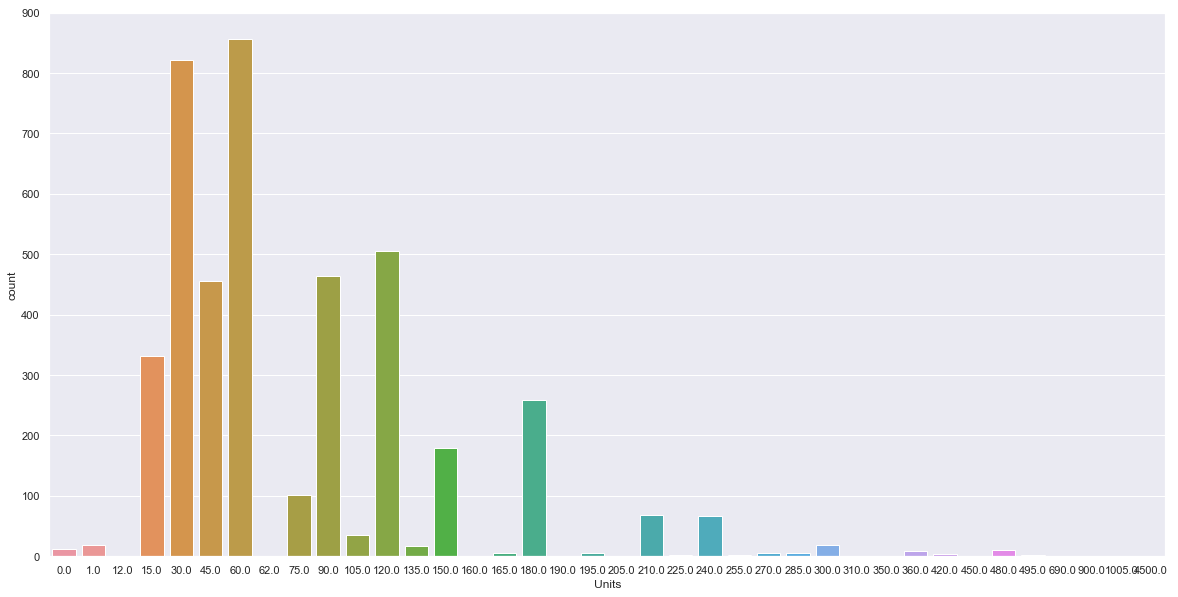

In [12]:
#visualization
import seaborn as sns
sns.set()

ax = sns.countplot(x="Units", 
                   data=hifi_case)


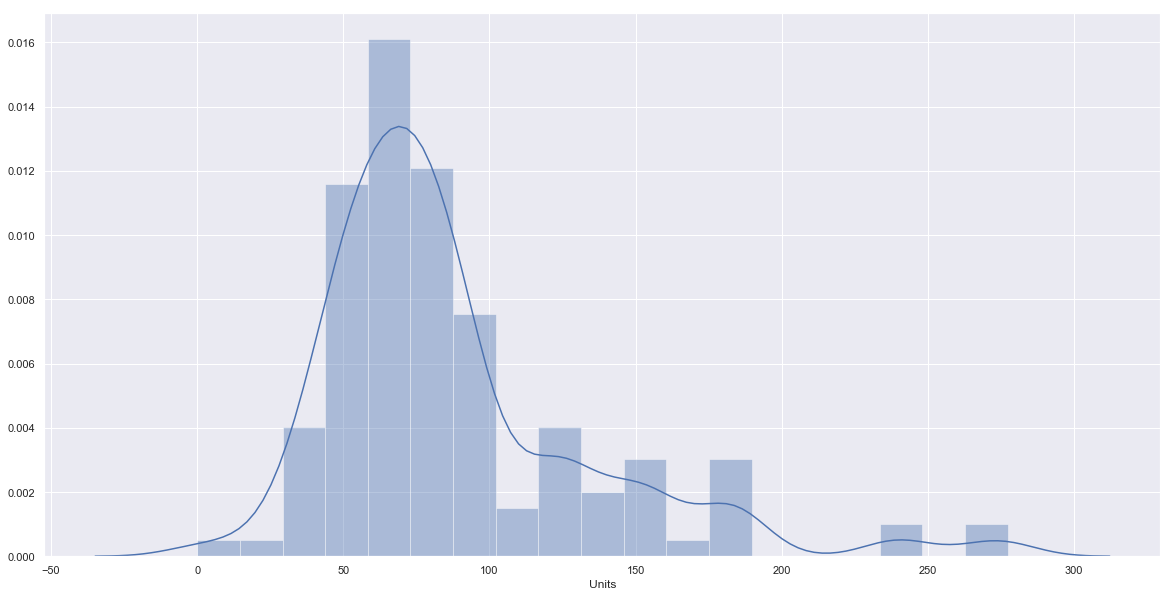

In [18]:
sns.distplot(hifi_group["Units"]);

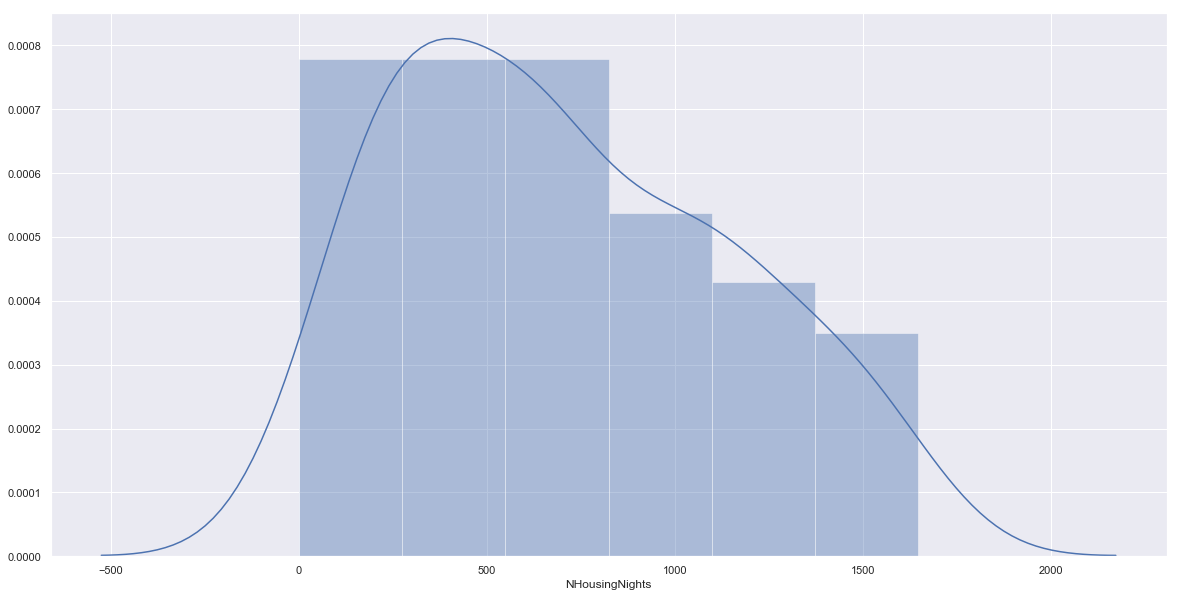

In [19]:
sns.distplot(hifi_group["NHousingNights"]);

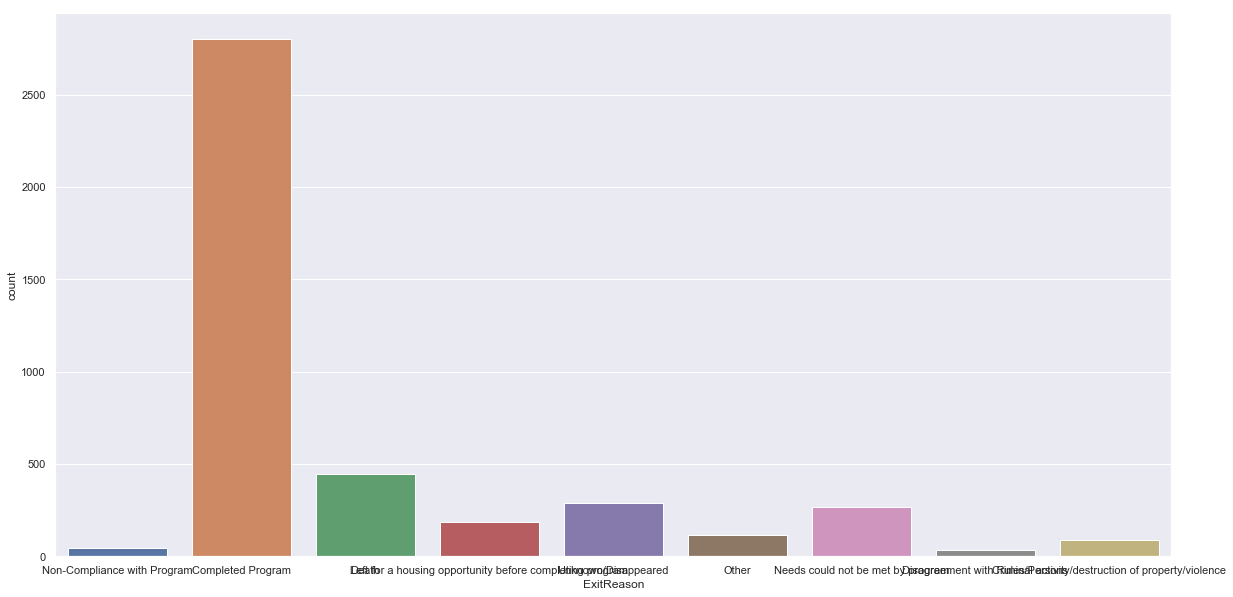

In [13]:
ax = sns.countplot(x="ExitReason", data=hifi_case)


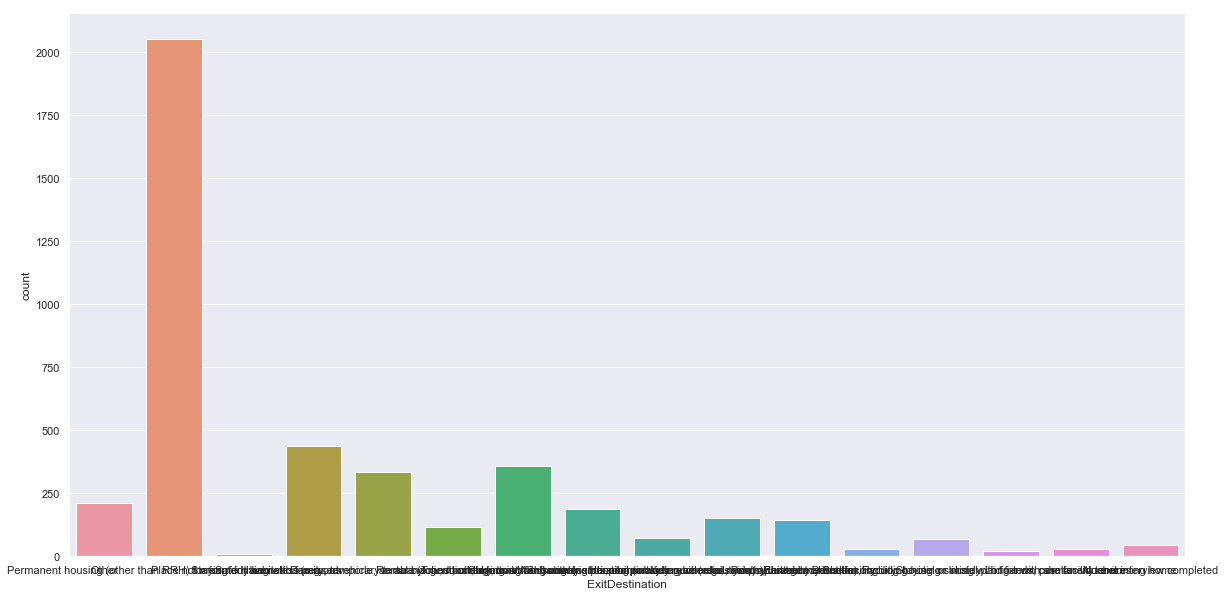

In [14]:
ax = sns.countplot(x="ExitDestination", data=hifi_case)


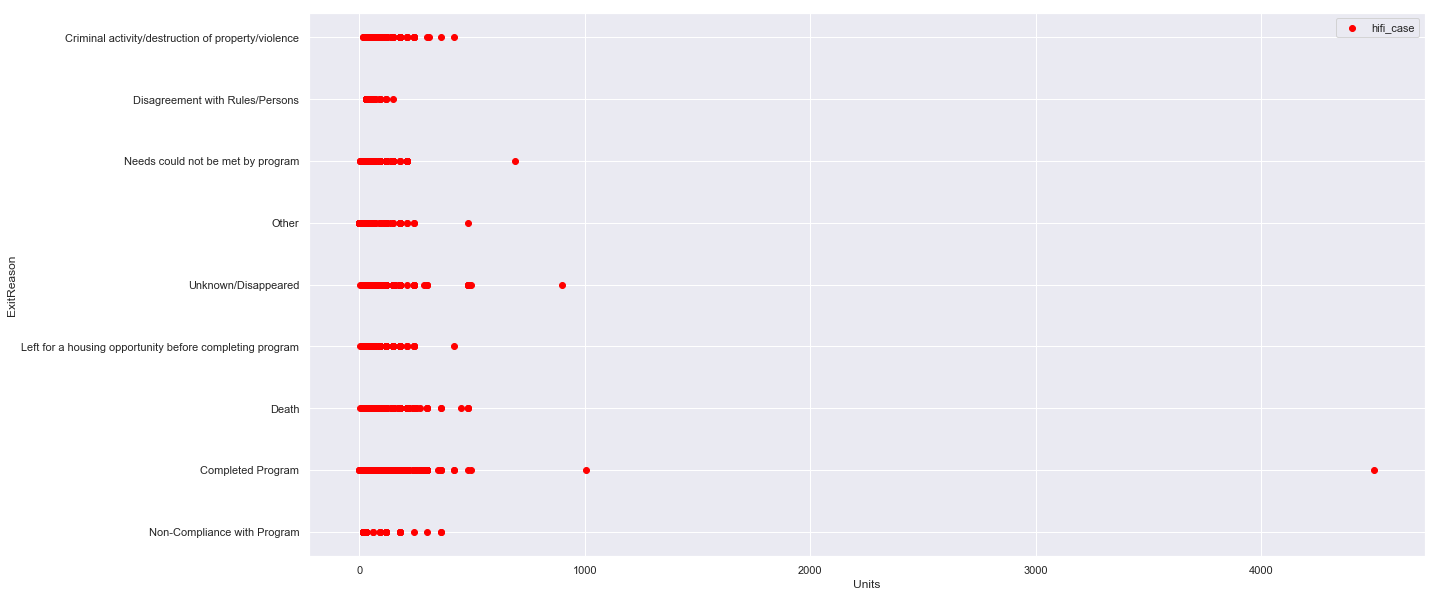

In [15]:
plt.scatter(hifi_case['Units'], hifi_case['ExitReason'],  
            color='red',
            label='hifi_case')

plt.legend()
plt.xlabel('Units'); plt.ylabel('ExitReason')
#plt.ylim((0,50))
plt.show()

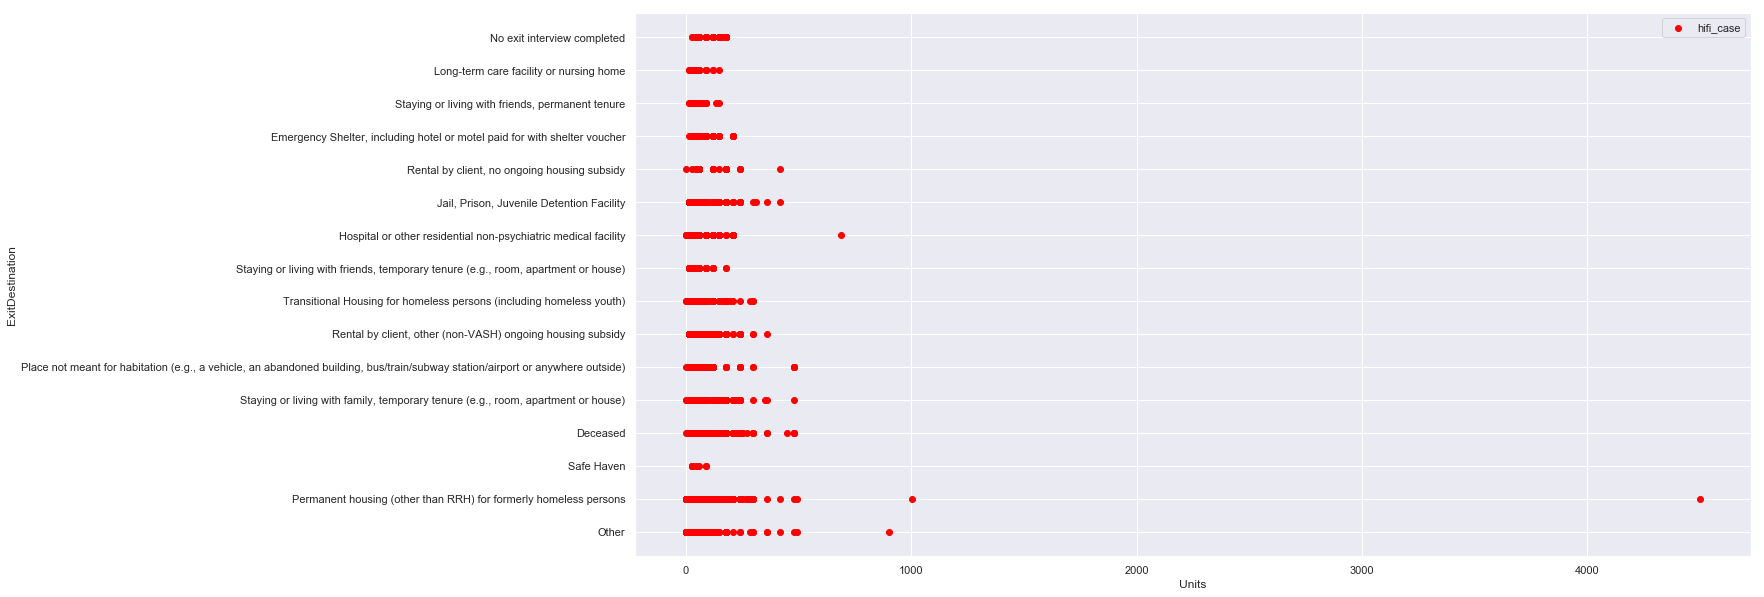

In [16]:
plt.scatter(hifi_case['Units'], hifi_case['ExitDestination'],  
            color='red',
            label='hifi_case')

plt.legend()
plt.xlabel('Units'); plt.ylabel('ExitDestination')
#plt.ylim((0,50))
plt.show()

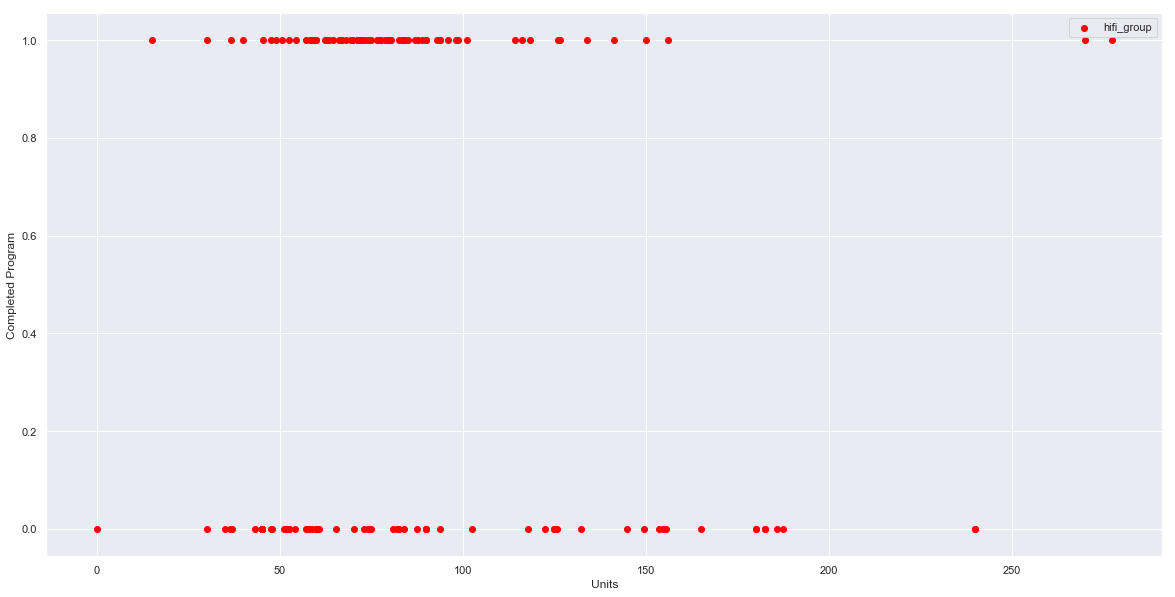

In [29]:
plt.scatter(hifi_group['Units'], hifi_group['Completed Program'],  
            color='red',
            label='hifi_group')


plt.legend()
plt.xlabel('Units'); plt.ylabel('Completed Program')
#plt.ylim((0,50))
plt.show()

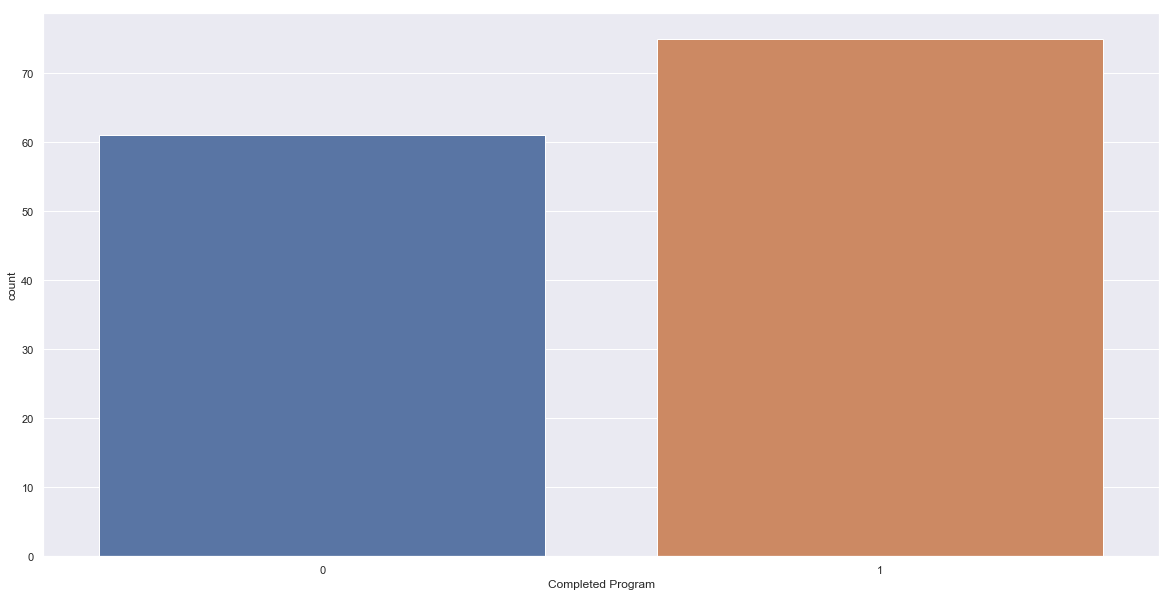

In [28]:
ax = sns.countplot(x="Completed Program", data=hifi_group)


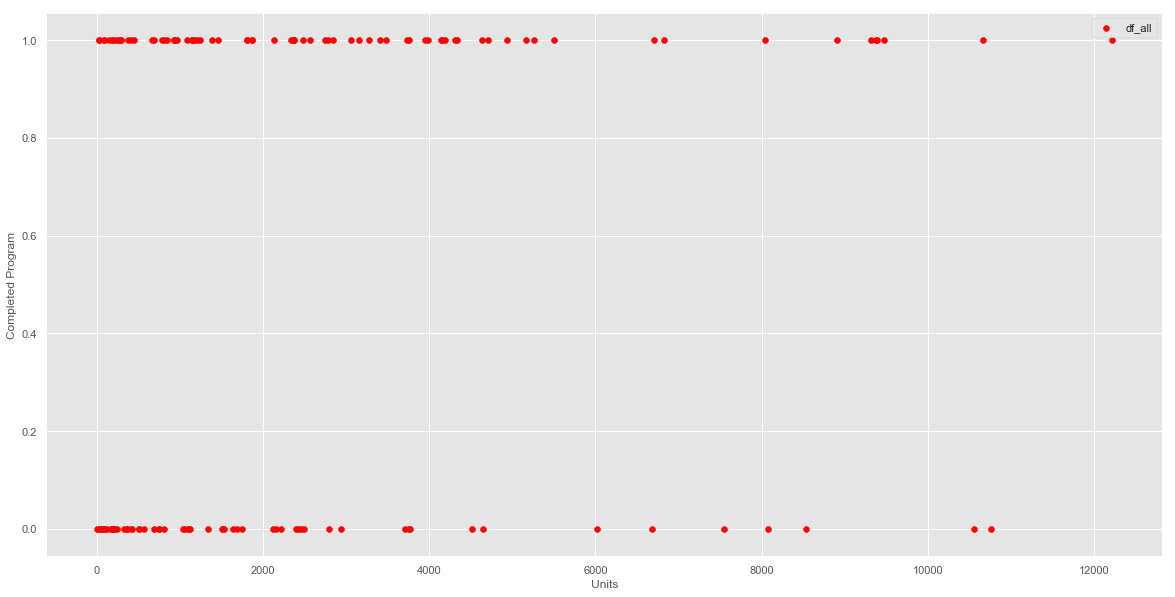

In [41]:
plt.scatter(df_all['Units'], df_all['Completed Program'],  
            color='red',
            label='df_all')


plt.legend()
plt.xlabel('Units'); plt.ylabel('Completed Program')
#plt.ylim((0,50))
plt.show()

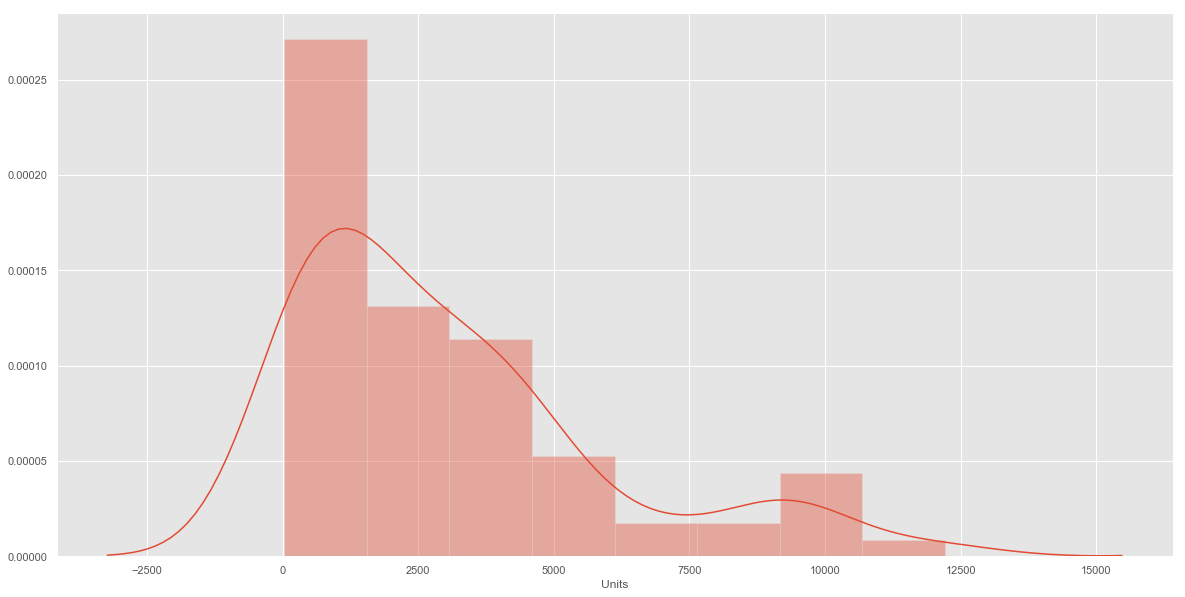

In [48]:
mask = df_all['Completed Program'] > 0
df_all_pass = df_all[mask]

sns.distplot(df_all_pass["Units"]);

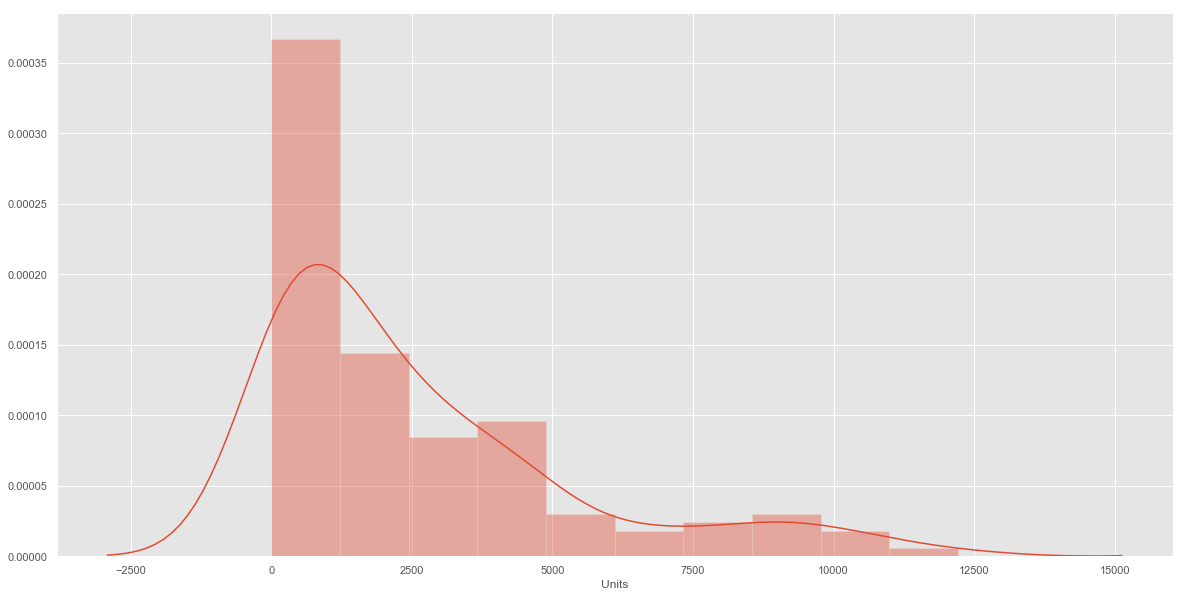

In [49]:
sns.distplot(df_all["Units"]);